# Airbnb Housing Reviews - TextMining

### Group members: Kuangyi Zhang, Lanyixuan Xu, Jie Bao

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

# I. Data Preprocessing

### Read the dataset

In [86]:
housing_reviews = pd.read_table("reviews.csv", header='infer', delimiter=",", na_values='NaN')

In [87]:
housing_reviews.shape

(132353, 7)

In [88]:
housing_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,rating,comments
0,1301530,13937403,6/8/14,55,Deborah,93,Great location downtown near everything! Host ...
1,192652,708419,11/10/11,99,Laura,97,"Stephanie was awesome! Highly recommended, gre..."
2,14081954,146698448,4/23/17,464,Jamison,100,The place was so cool. The whole family loved ...
3,9452418,75922280,5/23/16,706,Eamon,100,Anne is a very thoughtful host who left all th...
4,3385966,108126286,10/14/16,1143,Katie,97,"Chad's place is awesome! It's a quiet, clean, ..."


In [89]:
housing_reviews.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
listing_id,132353,NaN,NaN,NaN,7.32167e+06,5.08661e+06,2384,2.73061e+06,6.88433e+06,1.19731e+07,1.85981e+07
id,132353,NaN,NaN,NaN,8.26275e+07,4.17666e+07,849,4.85532e+07,8.64855e+07,1.14583e+08,1.51007e+08
date,132353,2267,3/19/17,780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewer_id,132353,NaN,NaN,NaN,3.96426e+07,3.28041e+07,55,1.19079e+07,3.12252e+07,6.14423e+07,1.29263e+08
reviewer_name,132353,22527,Michael,1333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,132353,NaN,NaN,NaN,94.834,4.5955,0,93,96,98,100
comments,132206,130167,The host canceled this reservation the day bef...,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop the missing value 

In [90]:
drop_rating_index = housing_reviews.index[housing_reviews['rating'] == 0]
drop_rating_index.tolist()
len(drop_rating_index)

43

In [91]:
drop_rating_index

Int64Index([  4130,   4481,   5888,  13391,  18099,  22288,  26113,  34279,
             41897,  43742,  44443,  57679,  58046,  61173,  64863,  65453,
             69640,  71573,  72794,  74187,  75437,  76131,  78542,  79317,
             91456,  92856,  94455,  96110, 101706, 104714, 111353, 113755,
            121041, 123545, 124217, 125056, 125250, 126668, 126776, 130801,
            130930, 131579, 131691],
           dtype='int64')

In [92]:
housing_reviews[4125:4132]

,listing_id,id,date,reviewer_id,reviewer_name,rating,comments
4125,7803642,113971997,11/14/16,908958,Mitch,92,The space was just what I needed for a weekend...
4126,220660,4117595,4/11/13,909738,Dan,95,"Like the other reviews posted, I absolutely en..."
4127,4092283,25912841,1/29/15,909780,Adam,97,Jessica's place is awesome. Great location in ...
4128,3809530,75935478,5/23/16,909817,Jamar,99,Laura did a great job of welcoming me to her a...
4129,44020,15846393,7/16/14,909877,Aaron,78,The patio/deck in back absolutely makes this r...
4130,16517889,138331381,3/19/17,910034,Matthew,0,Great place to stay! would highly recommend !
4131,7659968,139294981,3/24/17,910122,Lisa,100,These hosts are great at communicating. Their...


In [128]:
housing_reviews = housing_reviews.drop(housing_reviews.index[drop_rating_index])
housing_reviews.shape

(132120, 7)

In [129]:
housing_reviews = housing_reviews[~housing_reviews['comments'].isnull()] 
housing_reviews = housing_reviews[~housing_reviews['rating'].isnull()] 
housing_reviews.shape

(132120, 7)

### Separate into test and target variables

In [142]:
reviews_target = housing_reviews['rating']
reviews_x = housing_reviews[['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
housing_reviews['rating'].describe()

count    132120.000000
mean         94.865811
std           4.266499
min          20.000000
25%          93.000000
50%          96.000000
75%          98.000000
max         100.000000
Name: rating, dtype: float64

In [143]:
reviews_target

0          93
1          97
2         100
3         100
4          97
5          92
6          91
7          98
8          98
9          90
10         95
11         93
12         90
13         99
14         96
15         97
16         93
17         94
18         96
19         96
20         98
21         98
22         99
23         95
24         95
25         93
26         92
27         95
28         98
29         92
         ... 
132323    100
132324     94
132325    100
132326    100
132327     95
132328     98
132329    100
132330     96
132331     87
132332     92
132333     87
132334     84
132335     99
132336     94
132337    100
132338     90
132339    100
132340     96
132341    100
132342    100
132343    100
132344     97
132345     94
132346    100
132347     97
132348    100
132349    100
132350     99
132351     97
132352     94
Name: rating, Length: 132120, dtype: int64

In [144]:
df = pd.DataFrame()
df['rating'], bins = pd.qcut(reviews_target, 5, labels=np.arange(5) + 1 , retbins = True)

0         2
1         3
2         5
3         5
4         3
5         1
6         1
7         4
8         4
9         1
10        2
11        2
12        1
13        5
14        3
15        3
16        2
17        2
18        3
19        3
20        4
21        4
22        5
23        2
24        2
25        2
26        1
27        2
28        4
29        1
         ..
132323    5
132324    2
132325    5
132326    5
132327    2
132328    4
132329    5
132330    3
132331    1
132332    1
132333    1
132334    1
132335    5
132336    2
132337    5
132338    1
132339    5
132340    3
132341    5
132342    5
132343    5
132344    3
132345    2
132346    5
132347    3
132348    5
132349    5
132350    5
132351    3
132352    2
Name: rating, Length: 132120, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [146]:
df

,rating
0,2
1,3
2,5
3,5
4,3
5,1
6,1
7,4
8,4
9,1


In [172]:
df.rating = pd.Categorical(df.rating)
df['code'] = df.rating.cat.codes
reviews_target = df.rating.astype('category').cat.codes
len(reviews_target)

132120

In [173]:
reviews_target

0         1
1         2
2         4
3         4
4         2
5         0
6         0
7         3
8         3
9         0
10        1
11        1
12        0
13        4
14        2
15        2
16        1
17        1
18        2
19        2
20        3
21        3
22        4
23        1
24        1
25        1
26        0
27        1
28        3
29        0
         ..
132323    4
132324    1
132325    4
132326    4
132327    1
132328    3
132329    4
132330    2
132331    0
132332    0
132333    0
132334    0
132335    4
132336    1
132337    4
132338    0
132339    4
132340    2
132341    4
132342    4
132343    4
132344    2
132345    1
132346    4
132347    2
132348    4
132349    4
132350    4
132351    2
132352    1
Length: 132120, dtype: int8

In [174]:
print pd.value_counts(reviews_target)

1    32202
2    32015
0    28618
4    21782
3    17503
dtype: int64


In [184]:
reviews_target = reviews_target.iloc[0:132120] + 1 
reviews_target

0         2
1         3
2         5
3         5
4         3
5         1
6         1
7         4
8         4
9         1
10        2
11        2
12        1
13        5
14        3
15        3
16        2
17        2
18        3
19        3
20        4
21        4
22        5
23        2
24        2
25        2
26        1
27        2
28        4
29        1
         ..
132323    5
132324    2
132325    5
132326    5
132327    2
132328    4
132329    5
132330    3
132331    1
132332    1
132333    1
132334    1
132335    5
132336    2
132337    5
132338    1
132339    5
132340    3
132341    5
132342    5
132343    5
132344    3
132345    2
132346    5
132347    3
132348    5
132349    5
132350    5
132351    3
132352    2
Length: 132120, dtype: int8

In [185]:
print pd.value_counts(reviews_target)

2    32202
3    32015
1    28618
5    21782
4    17503
dtype: int64


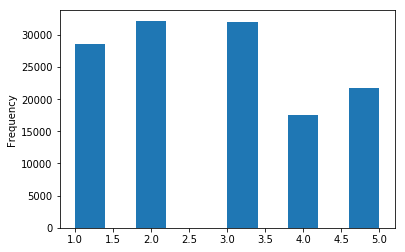

In [186]:
%matplotlib inline
reviews_target.plot(kind="hist", bins=10)

# 2. Document Text Mining Preprocessing

### 2.1 Functions used for preprocessing the text and parsing

In [187]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

In [188]:
#the words which appear frequently in the document
words_to_remove=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

In [189]:
# Remove stopwords, tokenize and stemming
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
from nltk.stem.porter import PorterStemmer
def clean_my_data(text):
    stemmer = PorterStemmer()
    clean_text=[]
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    container=[]
    for words in tagged:

        if (words[1][0] == 'N' or words[1][0]=='J' or words[1][0] == 'V') and (words[1][0] not in words_to_remove):
            container.append(words[0])
    for words in container:
        word = stemmer.stem(words)
        clean_text.append(word)
    return ' '.join(clean_text)

In [190]:
from bs4 import BeautifulSoup
comments = np.array(reviews_x['comments'])
size  = len(comments)
print size

132120


In [191]:
clean_text = []
number = 0
for comment in comments:
    text = BeautifulSoup(comment).get_text()
    text = clean_my_data(text)
    clean_text.append(text)
    if(number % 5000 == 0):
        print number, "for", 100*(number/float(size)), "%"
    number += 1

0 for 0.0 %
200 for 0.151377535574 %
400 for 0.302755071147 %
600 for 0.454132606721 %
800 for 0.605510142295 %
1000 for 0.756887677869 %
1200 for 0.908265213442 %
1400 for 1.05964274902 %
1600 for 1.21102028459 %
1800 for 1.36239782016 %
2000 for 1.51377535574 %
2200 for 1.66515289131 %
2400 for 1.81653042688 %
2600 for 1.96790796246 %
2800 for 2.11928549803 %
3000 for 2.27066303361 %
3200 for 2.42204056918 %
3400 for 2.57341810475 %
3600 for 2.72479564033 %
3800 for 2.8761731759 %
4000 for 3.02755071147 %
4200 for 3.17892824705 %
4400 for 3.33030578262 %
4600 for 3.4816833182 %
4800 for 3.63306085377 %
5000 for 3.78443838934 %
5200 for 3.93581592492 %
5400 for 4.08719346049 %
5600 for 4.23857099606 %
5800 for 4.38994853164 %
6000 for 4.54132606721 %
6200 for 4.69270360279 %
6400 for 4.84408113836 %
6600 for 4.99545867393 %
6800 for 5.14683620951 %
7000 for 5.29821374508 %
7200 for 5.44959128065 %
7400 for 5.60096881623 %
7600 for 5.7523463518 %
7800 for 5.90372388738 %
8000 for 6.055

63800 for 48.289433848 %
64000 for 48.4408113836 %
64200 for 48.5921889192 %
64400 for 48.7435664547 %
64600 for 48.8949439903 %
64800 for 49.0463215259 %
65000 for 49.1976990615 %
65200 for 49.349076597 %
65400 for 49.5004541326 %
65600 for 49.6518316682 %
65800 for 49.8032092038 %
66000 for 49.9545867393 %
66200 for 50.1059642749 %
66400 for 50.2573418105 %
66600 for 50.408719346 %
66800 for 50.5600968816 %
67000 for 50.7114744172 %
67200 for 50.8628519528 %
67400 for 51.0142294883 %
67600 for 51.1656070239 %
67800 for 51.3169845595 %
68000 for 51.4683620951 %
68200 for 51.6197396306 %
68400 for 51.7711171662 %
68600 for 51.9224947018 %
68800 for 52.0738722374 %
69000 for 52.2252497729 %
69200 for 52.3766273085 %
69400 for 52.5280048441 %
69600 for 52.6793823797 %
69800 for 52.8307599152 %
70000 for 52.9821374508 %
70200 for 53.1335149864 %
70400 for 53.2848925219 %
70600 for 53.4362700575 %
70800 for 53.5876475931 %
71000 for 53.7390251287 %
71200 for 53.8904026642 %
71400 for 54.04

/Users/Jie/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:219: UserWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


72400 for 54.7986678777 %
72600 for 54.9500454133 %
72800 for 55.1014229488 %
73000 for 55.2528004844 %
73200 for 55.40417802 %
73400 for 55.5555555556 %
73600 for 55.7069330911 %
73800 for 55.8583106267 %
74000 for 56.0096881623 %
74200 for 56.1610656979 %
74400 for 56.3124432334 %
74600 for 56.463820769 %
74800 for 56.6151983046 %
75000 for 56.7665758401 %
75200 for 56.9179533757 %
75400 for 57.0693309113 %
75600 for 57.2207084469 %
75800 for 57.3720859824 %
76000 for 57.523463518 %
76200 for 57.6748410536 %
76400 for 57.8262185892 %
76600 for 57.9775961247 %
76800 for 58.1289736603 %
77000 for 58.2803511959 %
77200 for 58.4317287315 %
77400 for 58.583106267 %
77600 for 58.7344838026 %
77800 for 58.8858613382 %
78000 for 59.0372388738 %
78200 for 59.1886164093 %
78400 for 59.3399939449 %
78600 for 59.4913714805 %
78800 for 59.642749016 %
79000 for 59.7941265516 %
79200 for 59.9455040872 %
79400 for 60.0968816228 %
79600 for 60.2482591583 %
79800 for 60.3996366939 %
80000 for 60.55101

/Users/Jie/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:219: UserWarning: "/" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


127400 for 96.4274901605 %
127600 for 96.578867696 %
127800 for 96.7302452316 %
128000 for 96.8816227672 %
128200 for 97.0330003028 %
128400 for 97.1843778383 %
128600 for 97.3357553739 %
128800 for 97.4871329095 %
129000 for 97.638510445 %
129200 for 97.7898879806 %
129400 for 97.9412655162 %
129600 for 98.0926430518 %
129800 for 98.2440205873 %
130000 for 98.3953981229 %
130200 for 98.5467756585 %
130400 for 98.6981531941 %
130600 for 98.8495307296 %
130800 for 99.0009082652 %
131000 for 99.1522858008 %
131200 for 99.3036633364 %
131400 for 99.4550408719 %
131600 for 99.6064184075 %
131800 for 99.7577959431 %
132000 for 99.9091734787 %


In [192]:
print clean_text[10]

great place great host excel commun process


In [193]:
comments[10]

'Great place and a great host.  Excellent communication throughout the process.'

In [194]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib
import cPickle as pickle

cv = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000)
cv_fit = cv.fit_transform(clean_text)
cv_fit

<132120x5000 sparse matrix of type '<type 'numpy.int64'>'
	with 3370055 stored elements in Compressed Sparse Row format>

In [195]:
len(cv_fit.toarray()[0])

5000

In [196]:
print(cv_fit.toarray().sum(axis=0))

[986  38  74 ... 156  51  71]


In [197]:
top5000words = cv.get_feature_names()
print(top5000words[0:1000])

[u'10', u'10min', u'11', u'12', u'15', u'15min', u'1st', u'20', u'20min', u'24', u'25', u'2nd', u'30', u'35', u'40', u'45', u'4th', u'90', u'aaron', u'abandon', u'abbi', u'abbiamo', u'abend', u'aber', u'abil', u'abl', u'abnb', u'abod', u'abov', u'absenc', u'absolut', u'abund', u'ac', u'acc', u'accent', u'accept', u'acces', u'acceso', u'access', u'accessori', u'accid', u'accomad', u'accomid', u'accommod', u'accommodating', u'accomod', u'accompani', u'accord', u'account', u'accueil', u'accueillant', u'accueilli', u'accur', u'accus', u'accustom', u'acc\xec', u'acogedor', u'acquaint', u'act', u'action', u'activ', u'actual', u'ad', u'adam', u'adapt', u'add', u'addison', u'addit', u'address', u'adem\xec\xe1', u'adequ', u'adi', u'adjac', u'adjoin', u'adjust', u'admir', u'admit', u'ador', u'adorn', u'adress', u'adriana', u'adult', u'advanc', u'advantag', u'adventur', u'advertis', u'advic', u'advis', u'ae', u'aeropuerto', u'aesthet', u'affect', u'affection', u'afford', u'afraid', u'afri', u'afr

In [198]:
# Save the model
joblib.dump(cv, 'CountVectorizer.pkl') 
with open("top5000words.txt", 'wb') as f:
    pickle.dump(top5000words, f)

### Create features using Scikit Learn TFIDF 

In [199]:
#TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_trans= TfidfTransformer()
cv_tfidf= tfidf_trans.fit_transform(cv_fit)

# model saving
joblib.dump(cv_tfidf, 'cv_tfidf.pkl') 

['cv_tfidf.pkl']

In [200]:
print cv_tfidf.toarray()[:10]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 3. Classification model

### Split into training and testing data

In [201]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cv_tfidf, reviews_target, test_size=0.2, random_state=35)
print x_train.shape, x_test.shape, y_train.shape, y_test.shape 

(105696, 5000) (26424, 5000) (105696,) (26424,)


In [202]:
#The performance metrices of various algorithm
accuracy= pd.DataFrame()
Algorith=[]
Accuracy=[]

In [203]:
from  sklearn.metrics import log_loss, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import loadtxt
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

### Decision Tree

In [204]:
treeclf = DecisionTreeClassifier(criterion='entropy')
parameters = {
    'max_depth': [8, 10, 12, 14, 18, 20, 25, 40, 50],
    'min_samples_split': [4, 6, 10]
}
gs_decisionTree = GridSearchCV(treeclf, parameters, verbose=1, cv=5, scoring='accuracy')
%time _ = gs_decisionTree.fit(x_train, y_train)
Algorith.append('Decision Tree')
Accuracy.append(gs_decisionTree.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 38.8min finished


CPU times: user 39min 22s, sys: 10 s, total: 39min 32s
Wall time: 39min 42s


In [205]:
print "The best parameters: %s" %gs_decisionTree.best_params_
print "The best accuracy result: %s" %abs(gs_decisionTree.best_score_)

The best parameters: {'min_samples_split': 10, 'max_depth': 50}
The best accuracy result: 0.306794959128


### Naïve Bayes

In [206]:
mnbclf = MultinomialNB()
parameters = {
    'fit_prior': [True, False],
    'alpha': np.linspace(0.0001, 5, 10)
}
gs_MultinomialNB = GridSearchCV(mnbclf, parameters, verbose=1, cv=5, scoring='accuracy')
%time _ = gs_MultinomialNB.fit(x_train, y_train)

Algorith.append('Naïve Bayes')
Accuracy.append(gs_MultinomialNB.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 7.08 s, sys: 1.12 s, total: 8.21 s
Wall time: 8.23 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.1s finished


In [207]:
print "The best parameters: %s" %gs_MultinomialNB.best_params_
print "The best accuracy result: %s" %abs(gs_MultinomialNB.best_score_)

The best parameters: {'alpha': 0.0001, 'fit_prior': True}
The best accuracy result: 0.496565622162


### Random Forest

In [208]:
rfclf = RandomForestClassifier(criterion='entropy')
parameters = {
    'min_samples_leaf': [2, 4, 6, 10],
    'max_depth':[40, 50, 80, 100],
    'max_features':[10, 25, 40, 50]
}
gs_RandomForest = GridSearchCV(rfclf, parameters, verbose=1, cv=5, scoring='accuracy')
%time _ = gs_RandomForest.fit(x_train, y_train)

Algorith.append('Random Forest')
Accuracy.append(gs_RandomForest.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  8.4min finished


CPU times: user 8min 12s, sys: 15.3 s, total: 8min 27s
Wall time: 8min 29s


In [209]:
print "The best parameters: %s" %gs_RandomForest.best_params_
print "The best accuracy result: %s" %abs(gs_RandomForest.best_score_)

The best parameters: {'max_features': 50, 'max_depth': 50, 'min_samples_leaf': 4}
The best accuracy result: 0.363750756888


### Gradient Boosting

In [210]:
gbclf= GradientBoostingClassifier()
parameters = {
    'min_samples_split': [2, 4, 6, 8, 10],
    'max_features':[40, 50]
}

gs_GradientBoosting = GridSearchCV(gbclf, parameters, verbose=1, cv=5, scoring='accuracy')
%time _ = gs_GradientBoosting.fit(x_train, y_train)

Algorith.append('Gradient Boost')
Accuracy.append(gs_GradientBoosting.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 17.7min finished


CPU times: user 16min 29s, sys: 1min 37s, total: 18min 7s
Wall time: 18min 9s


In [211]:
print "The best parameters: %s" %gs_GradientBoosting.best_params_
print "The best accuracy result: %s" %abs(gs_GradientBoosting.best_score_)

The best parameters: {'max_features': 50, 'min_samples_split': 2}
The best accuracy result: 0.431832803512


### Regression

In [212]:
parameters = {
    'penalty': ['l1','l2'],
    'C': [1e-5, 1, 1e5]
}
rgclf = linear_model.LogisticRegression()
gs_Regression = GridSearchCV(rgclf, parameters, verbose=1, cv=5, scoring='accuracy')

%time _ = gs_Regression.fit(x_train, y_train)
Algorith.append('Regression')
Accuracy.append(gs_Regression.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 31.6min finished


CPU times: user 59min 38s, sys: 31.6 s, total: 1h 9s
Wall time: 31min 48s


In [213]:
print "The best parameters: %s" %gs_Regression.best_params_
print "The best accuracy result: %s" %abs(gs_Regression.best_score_)

The best parameters: {'penalty': 'l1', 'C': 1}
The best accuracy result: 0.514428171359


### Dataframe showing the performance metrices of the algorithms

In [214]:
accuracy['Algorith']= Algorith
accuracy['Accuracy']= Accuracy
print(accuracy)

         Algorith  Accuracy
0   Decision Tree  0.306795
1     Naïve Bayes  0.496566
2   Random Forest  0.363751
3  Gradient Boost  0.431833
4      Regression  0.514428


# 4. Use best parameters to build the models 

In [51]:
prediction = dict()

### Decision Tree

In [53]:
tree_clf = DecisionTreeClassifier(criterion='entropy', min_samples_split = 10, max_depth = 10)
model_dt = tree_clf.fit(x_train, y_train)
prediction['DecisionTree'] = model_dt.predict(x_test)

In [65]:
joblib.dump(model_dt, 'DecisionTree_Predict_Rating.pkl')

['DecisionTree_Predict_Rating.pkl']

### Naïve Bayes

In [57]:
nb_clf = MultinomialNB(alpha=0.556, fit_prior = False)
model_nb = nb_clf.fit(x_train, y_train)
prediction['NaiveBayes'] = model_nb.predict(x_test)

In [67]:
joblib.dump(model_nb, 'NaiveBayes_Predict_Rating.pkl')

['NaiveBayes_Predict_Rating.pkl']

### Random Forest

In [58]:
rf_clf = RandomForestClassifier(criterion='entropy', max_features = 25, max_depth = 40, min_samples_leaf = 4)
model_rf = rf_clf.fit(x_train, y_train)
prediction['RandomForest'] = model_rf.predict(x_test)

In [68]:
joblib.dump(model_rf, 'RandomForest_Predict_Rating.pkl')

['RandomForest_Predict_Rating.pkl']

### Gradient Boosting 

In [59]:
gb_clf= GradientBoostingClassifier(min_samples_split = 2, max_features = 50)
model_gb = gb_clf.fit(x_train, y_train)
prediction['GradientBoosting'] = model_gb.predict(x_test)

In [69]:
joblib.dump(model_gb, 'GradientBoosting_Predict_Rating.pkl')

['GradientBoosting_Predict_Rating.pkl']

### Regression

In [61]:
rg_clf = linear_model.LogisticRegression(C=1, penalty='l1')
model_rg = rg_clf.fit(x_train, y_train)
prediction['Regression'] = model_rg.predict(x_test)

In [71]:
joblib.dump(model_rg, 'Regression_Predict_Rating.pkl')

['Regression_Predict_Rating.pkl']

### Results 

In [64]:
from  sklearn.metrics import accuracy_score
print accuracy_score(y_test, prediction['DecisionTree'])
print accuracy_score(y_test, prediction['NaiveBayes'])
print accuracy_score(y_test, prediction['RandomForest'])
print accuracy_score(y_test, prediction['GradientBoosting'])
print accuracy_score(y_test, prediction['Regression'])

0.14689265536723164
0.17836965294592413
0.15899919289749798
0.15012106537530268
0.1807909604519774
